## Static propellers

We saw that the helicopter’s rotor provides three basic functions: generation of lift, generation of propulsive force for forward flight a generation of forces to control attitude and position. From these function, hover flight is the main goal and the simplest of the flight regimes.  To meet these demanding roles, the rotor designer requires considerable knowledge of the main factors on which both the thrust and the power provided by the engine may depend as well as detecting an adequate aerodynamic environment in which the rotor can operate optimally, avoiding situations where aerodynamic loads can affect the efficiency of rotor behaviour.

**Rotational speed**
Velocity variation along the blade is radially linear, with zero flow velocity at the rotational axis and reaching a maximum at the blade tip. The local dynamic pressure at any blade element is proportional to the square of the distance from the rotational axis. Based on elementary consierations, the average rotor thrust will depend on the square of the rotor tip speed, $V_{tip}=\Omega R$, that is $T ∝ \Omega^2$. Also the power will depend on the cube of the tip speed, that is $P ∝ \Omega^3$.

*Distribution of incident velocity normal to a leading edge of the rotor blade at hovering state*
![Velocity normal to a leading edge of rotor blade at hover](./img/Rotor-blade-velocity-hover.jpg)

**Diameter and pitch**
There are two values that express the most important characteristics of all propellers: diameter and pitch. In general diameter is determined primarily by the rpm at which the propeller will be turning and the amount of power that will be delivered to the propeller. Normally according to manuals, if power is required to increase, diameter will increase as propeller rpm decreases. Diameter will also increase as propeller rpm decreases.
The pitch of the blade determines how far the propeller would move forwards in one revolution, like a screw into a advancing into a solid material, it measures how fast the air is passed through the blades  Lowering the pitch will increase rpm at slower speeds. Conversely, a higher pitch will deliver greater top speeds, but slower accelerations.
Both pitch and diameter affect how much thrust the motor must produce to turn the propeller at a given rpm.

**Air Compressibility**
At high relative airspeeds, approaching the speed of sound, compressibility effects must be taken into account. If rotor approaches this sort of speed, the speed of the advancing blade may cause problems, leading to the formation of compressibility zones and ultimately to strong shock waves. That means that compressibility is significant, which means that more power is required for the same thrust and problems of noise and vibrations are not solved. One of the solutions adopted by the manufacturer is to limit the RPM performance of the propeller and the use of adaptive tip blades.

### 1.- Dimensional Analysis

Both pitch and diameter affect how much thrust the motor must produce to turn the propeller at a given RPM. We will apply a dimensional analysis to obtain some important parameters for the design and choice of propellers. Thrust can be expressed as a function of rotational speed $n$, diameter $D$, pitch, drone speed $V_{drone}$, air volumic $\rho$ and air compressibility $B$.

$\displaystyle T=f(D,n,\rho,V_{drone},pitch,B)$

In this notebook the deduction of dimensionless coefficients will be done by means of the Python package called PINT.
The use of the package *PINT* permit us to manipulate physical quantities in an easy way, convert unities and reduce time in the calculation of the nondimensional coefficients. Under the following [link](https://pint.readthedocs.io/en/latest/) you can install *PINT*  in your system.

**Thrust coefficient**

In [299]:
import pint
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
from pint import formatter
import numpy as np
from pint import util
from IPython.display import display, Math, Latex

rho=Q_('kg/m^3')# Mass volumic of the air
n=Q_('Hz') # Rotational speed of the propller
T=Q_( 'N') #Thrust
D=Q_( 'm') #Diameter of propeller
pitch=Q_('m') #Pitch of propeller
V_drone=Q_('m/s') #Drone speed
B=Q_('N/m^2')#Air bulk modulus


We choose the output variable $Y$, the repetitive variables $X_{rep}$ and the non-repetitive variables $X_{nrep}$:

In [300]:
#Choice of repetitive and non-repetitive variables
import collections

X_rep = {'rho': rho,'D':D,'n':n}
X_nrep = {'V_{drone}': V_drone, 'pitch': pitch,'B':B}
Y = {'T': T }

Variables = collections.OrderedDict(X_rep)
Variables.update(Y)
Variables.update(X_nrep)

In [301]:
#Buckingham Theorem
PI_numbers = ureg.pi_theorem(Variables)

N_PI = len(PI_numbers)
print('Definition of the dimensionless numbers:'); print('\n');
for i in range(0,N_PI):
    print('PI_'+str(i)+':'+' '+formatter(PI_numbers[i].items()))
    print('\n')

Definition of the dimensionless numbers:


PI_0: D ** 4 * n ** 2 * rho / T


PI_1: D * n / V_{drone}


PI_2: pitch / D


PI_3: D ** 2 * n ** 2 * rho / B




$\displaystyle 1/\Pi_0=\frac{T}{D^4 n^2 \rho}= C_T$ which is the thrust coefficient.

$\displaystyle 1/\Pi_1=\frac{V_\infty}{n D}=\mu $ which is the advance ratio, the ratio of the freestream fluid speed to the propeller speed.

$\displaystyle \Pi_2=\frac{pitch}{D}= \beta$ which is the relationship between propeller diameter and pitch .

$\displaystyle \Pi_3=\frac{D^2 n^2 \rho}{B}$.


**Power coefficient**



In [302]:
rho=Q_('kg/m^3')# Mass volumic of the air
n=Q_('Hz') # Rotational speed of the propller
P=Q_( 'W') #Power
D=Q_( 'm') #Diameter of propeller
pitch=Q_('m') #Pitch of propeller
V_drone=Q_('m/s') #Drone speed
B=Q_('N/m^2')#Air bulk modulus


X_rep = {'rho': rho,'D':D,'n':n}
X_nrep = {'V_{drone}': V_drone, 'pitch': pitch,'B':B}
Y = {'P': P }

Variables = collections.OrderedDict(X_rep)
Variables.update(Y)
Variables.update(X_nrep)

PI_numbers = ureg.pi_theorem(Variables)

N_PI = len(PI_numbers)
print('Definition of the dimensionless numbers:'); print('\n');
for i in range(0,N_PI):
    print('$\Pi_'+str(i)+':'+' '+formatter(PI_numbers[i].items()))
#    display('PI_'+str(i)+':'+' '+formatter(PI_numbers[i].items()))
#    print('Range:'); print(eval(formatter(PI_numbers[i].items())));
    print('\n')

Definition of the dimensionless numbers:


$\Pi_0: D ** 5 * n ** 3 * rho / P


$\Pi_1: D * n / V_{drone}


$\Pi_2: pitch / D


$\Pi_3: D ** 2 * n ** 2 * rho / B




$\displaystyle 1/\Pi_0=\frac{P}{D^5 n^3 \rho}= C_P$ which is the power coefficient.


### 2.- Filtering static propellers data

**Choice of APC Propellers Type MR**

Include FM equation

One of the most interesting scenarios we face when sizing the propeller is the static scenario ($V_{drone}=0$): hover and take-off. As we advanced before, these are the states in which the drone are sized to work most of the time, therefore the importance of finding an adequate propeller. 

To fulfill these scenarios a good ratio of power and thrust per RPM is needed and therefore a study of performance for propellers from different families is carried out. In the next graphic, the evolution of $C_T$ and $C_P$ for different RPM is shown for geometrically simmilar propellers .

In [13]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure

path='./Data/'
df = pd.read_csv(path+'APC-Graupner-GWS-9-4.csv',sep=';')
df=df[df['N.D']<105000]
df['FM']=df['CT']**(3/2)/(2**(0.5)*df['CP'])
df.head()

,TYPE,DIAMETER_IN,PITCH_IN,RPM,CT,CP,Beta,N.D,FM
0,APC E 9x4.5,9,4.5,2499,0.0893,0.0393,0.5,22491,0.480142
1,APC E 9x4.5,9,4.5,2800,0.0925,0.0394,0.5,25200,0.504895
2,APC E 9x4.5,9,4.5,3119,0.0936,0.0392,0.5,28071,0.516550
3,APC E 9x4.5,9,4.5,3384,0.0938,0.0386,0.5,30456,0.526262
4,APC E 9x4.5,9,4.5,3679,0.0945,0.0383,0.5,33111,0.536332


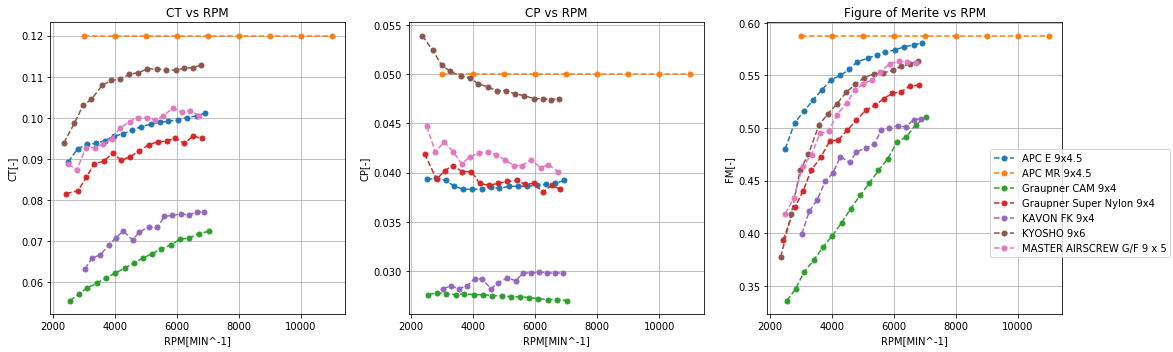

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

f, ((ax1, ax2,ax3)) = plt.subplots(1, 3,figsize=(15, 5))

groups = df.groupby('TYPE')

for name, group in groups:
    ax1.plot(group.RPM, group.CT, marker='o', linestyle='--', ms=5, 
label=name)
    
ax1.set_title('CT vs RPM')
ax1.set_xlabel('RPM[MIN^-1]')
ax1.set_ylabel('CT[-]')

for name, group in groups:
    ax2.plot(group.RPM, group.CP, marker='o', linestyle='--', ms=5, 
label='_nolegend_')
    
ax2.set_title('CP vs RPM')
ax2.set_xlabel('RPM[MIN^-1]')
ax2.set_ylabel('CP[-]')

for name, group in groups:
    ax3.plot(group.RPM, group.FM, marker='o', linestyle='--', ms=5, 
label='_nolegend_')
    
ax3.set_title('Figure of Merite vs RPM')
ax3.set_xlabel('RPM[MIN^-1]')
ax3.set_ylabel('FM[-]')

f.legend(bbox_to_anchor=(1, 0.25),loc='lower center', ncol=1)
#f.legend(loc=(axbox.x0,0),prop={'size': 8})
ax1.grid()    


ax2.grid() 


ax3.grid()    



f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


APC Props offer excellent efficiencies in the static domain, overpassing their competitors. 
In the next part, we are going to study in depth the APC Propellers and do a study to select one prop for our static domain.
A pareto chart for all APC Props is going to be done to see which propellers provide better performances.


**Pareto diagram**

In [15]:
import pandas as pd

# Read the .csv file with bearing data
df=pd.read_csv('APC_STATIC-data-all-props.csv',sep=';')


def dominated(x_,y_,X_,Y_):
    compteur=0
    for x,y in zip(X_,Y_):
        # x<x_ for small diameter and  y>y_ for high thrust
        if (x<x_) and (y>y_):
            compteur +=1
    return compteur

# We create here a new row which will give the information of component dominated for diameter-thrust not
df['Dominated']=False
for row in range(len(df['RPM'])):
    if dominated(df.loc[row,'DIAMETER(IN)'], df.loc[row,'THRUST(N)'],df['DIAMETER(IN)'].values,df['THRUST(N)'].values)>0:
        df.loc[row,'Dominated']=True

E      181
W        8
WPN      4
WE       4
MR       3
D        3
EPN      1
PN       1
C        1
Name: TYPE, dtype: int64

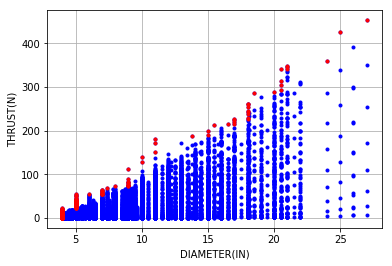

In [16]:
# We keep only the non dominated component (Pareto front)
df_filter=df[df['Dominated'] == False]

# plot of the data set with the Pareto front
g, ax = plt.subplots(1,1,sharex=True)
ax.plot(df['DIAMETER(IN)'],df['THRUST(N)'],'.b')
ax.plot(df_filter['DIAMETER(IN)'],df_filter['THRUST(N)'],'.r')
ax.set_ylabel('THRUST(N)')
ax.set_xlabel('DIAMETER(IN)')
ax.grid()

df_filter['TYPE'].value_counts()

As we can see APC-E is used for applications where high performance is required. 

Next we will compare the behavior of Ct and Cp against beta to extract models of regressions and we will extract conclusions.

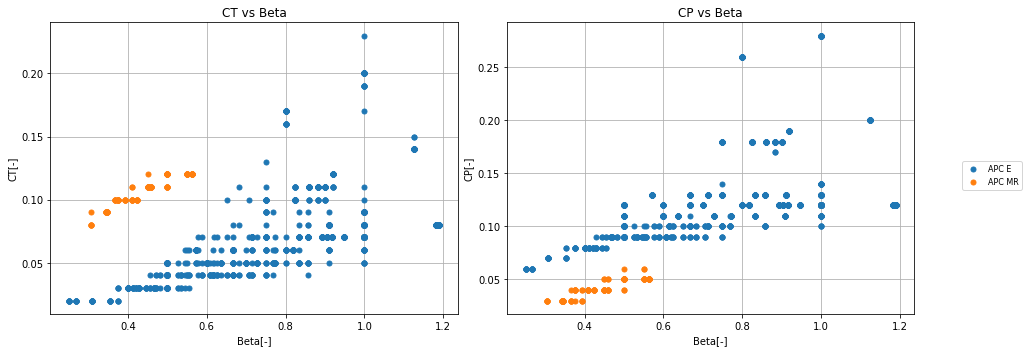

In [64]:
import pandas as pd

path='./Data/'
df = pd.read_csv(path+'APC-Graupner-GWS-Static.csv',sep=';')

df_APC=df[(df['TYPE'] == 'APC MR') | (df['TYPE'] == 'APC E') ]
df_APC=df_APC[df_APC['N.D']<105000]

f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(15, 5))

groups = df_APC.groupby('TYPE')

for name, group in groups:
    ax1.plot(group.Beta, group.CT, marker='o', linestyle='', ms=5, 
label=name)
    
ax1.set_title('CT vs Beta')
ax1.set_xlabel('Beta[-]')
ax1.set_ylabel('CT[-]')

for name, group in groups:
    ax2.plot(group.Beta, group.CP, marker='o', linestyle='', ms=5, 
label='_nolegend_')
    
ax2.set_title('CP vs Beta')
ax2.set_xlabel('Beta[-]')
ax2.set_ylabel('CP[-]')


f.legend(loc='center right',prop={'size': 8})
ax1.grid()    



ax2.grid()    


f.tight_layout()

plt.subplots_adjust(left=0.1, bottom=None, right=0.9, top=None,
                wspace=None, hspace=None)

We can see that APC-E has the advantage of a wide range of data for different Betas. However, it offers a great dispersion, which is not convenient for us to extract correlations. The design of the APC MR propellers have a low pitch obtaining good results in their static performance without a big dispersion. A high pitch propeller consumes more power and therefore it is more practical to use APC MR because it offers high efficiencies in static and we will not necessarily use the propellers in high performance scenarios.

**RPM limits**

Performance data are limited to a RPM limit proposed by the manufacturer. This maximum limit represents a safety factor, which takes into account the torsional vibrations carried out by the motor on each power pulse. Once the value of torsional vibration lays close to the blade's resonant frequency a complete failure can take place.

This phenomenon is a greater concern with aluminum propeller blades because of their lower natural resonant frequency[Ref](https://www.apcprop.com/technical-information/rpm-limits/). APC peopeller are made of long fiber composite which high stiffness is beneficial to the control of vibration resonane reponse and aero-elastic flutter.

Here a comparison of main mechanical properties for long fiber composites propellers in contrast to unreinforced Nylon and Glass Filled Nylon [Ref](https://www.apcprop.com/technical-information/manufacturing/#materials)

Mechanical Property  | Unreinforced Nylon  | Glass Filled Nylon | APC Long Fiber Composite
-- | -- | --| -- 
Tensile Strength [KSI] |11|18|24
Flexural Strength[KSI]|7|29|38


**Performance data**

The performance data of all APC propellers for the static case ($V=0$)  are registered in the file *APC_STATIC-data-all-props.csv*. These data will be filtered according to the type of propeller (in this case 'MR' class) and the product of rotational speed ('N') and diameter ('D').

In [20]:
import pandas as pd

path='./Data/'
df = pd.read_csv(path+'APC_STATIC-data-all-props.csv',sep=';')

df_MR=df[df['TYPE'] == 'MR']
df_ND=df_MR[df_MR['N.D']<105000]
df_ND.head()


,LINE,COMP,TYPE,RPM,DIAMETER(IN),PITCH(IN),BLADE(nb),THRUST(LBF),POWER(HP),TORQUE(IN.LBF),Cp,Ct,AREA(m^2),THRUST(N),POWER(W),ANGLE,EFF,N.D,B coef
135,147,8,MR,2000,10.0,4.5,2,0.14,0.01,0.09,0.04,0.11,0.05,0.6230,7.457,0.45,72.772802,20000.0,4209.900990
146,148,8,MR,3000,10.0,4.5,2,0.32,0.01,0.20,0.04,0.11,0.05,1.4240,7.457,0.45,72.772802,30000.0,9472.277228
147,149,8,MR,4000,10.0,4.5,2,0.57,0.02,0.36,0.04,0.11,0.05,2.5365,14.914,0.45,72.772802,40000.0,16839.603960
148,150,8,MR,5000,10.0,4.5,2,0.90,0.04,0.56,0.04,0.11,0.05,4.0050,29.828,0.45,72.772802,50000.0,26311.881190
149,151,8,MR,6000,10.0,4.5,2,1.29,0.08,0.79,0.04,0.11,0.05,5.7405,59.656,0.45,72.772802,60000.0,37889.108910


In the following chart we see the main correlations. The black dots correspond to the non-recommended operating areas.

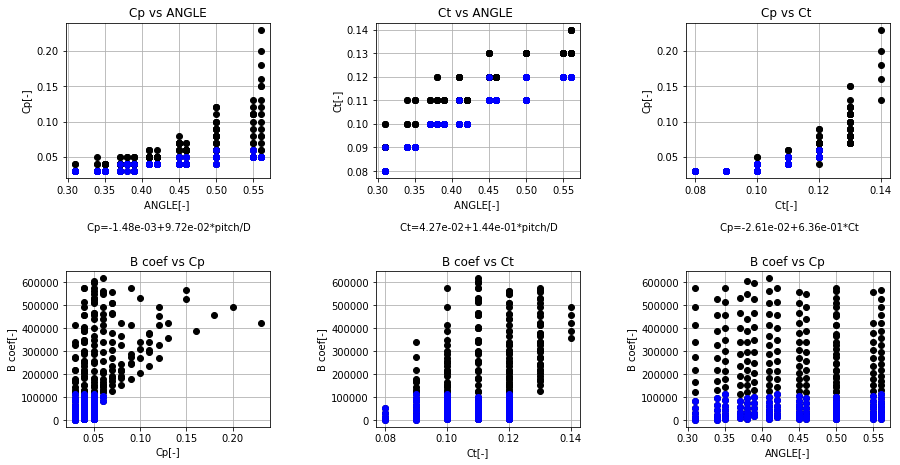

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

f, ((ax1, ax2, ax3), (ax4, ax5,ax6)) = plt.subplots(2, 3)

f.tight_layout()

#OLS Regression
x=df_ND['ANGLE'].values
y_Ct=df_ND['Ct'].values
y_Cp=df_ND['Cp'].values

X=np.concatenate((np.ones(np.size(x)).reshape(np.size(x),1),x.reshape(np.size(x),1)), axis=1)
Y_Ct=y_Ct.reshape((np.size(x),1))
Y_Cp=y_Cp.reshape((np.size(x),1))


#first subplot
modelCp = sm.OLS(Y_Cp, X)
resultCp = modelCp.fit()

ax1.plot(df_MR['ANGLE'],df_MR['Cp'], 'ko',df_ND['ANGLE'],df_ND['Cp'], 'bo')
ax1.set_title('Cp vs ANGLE')
ax1.set_xlabel('ANGLE[-] \n\n Cp=%.2e+%.2e*pitch/D'%(resultCp.params[0],resultCp.params[1]))
ax1.set_ylabel('Cp[-]')
ax1.grid()

#2 subplot
modelCt = sm.OLS(Y_Ct, X)
resultCt = modelCt.fit()

ax2.plot(df_MR['ANGLE'],df_MR['Ct'], 'ko',df_ND['ANGLE'],df_ND['Ct'], 'bo')
ax2.set_title('Ct vs ANGLE ')
ax2.set_xlabel('ANGLE[-] \n\n Ct=%.2e+%.2e*pitch/D'%(resultCt.params[0],resultCt.params[1]))
ax2.set_ylabel('Ct[-]')
ax2.grid()
#3 subplot

Y_Ct=np.concatenate((np.ones(np.size(x)).reshape(np.size(x),1),y_Ct.reshape(np.size(x),1)), axis=1)
modelCpCt = sm.OLS(Y_Cp, Y_Ct)
resultCpCt = modelCpCt.fit()


ax3.plot(df_MR['Ct'],df_MR['Cp'], 'ko',df_ND['Ct'],df_ND['Cp'], 'bo')
ax3.set_title('Cp vs Ct ')
ax3.set_xlabel('Ct[-] \n\n Cp=%.2e+%.2e*Ct'%(resultCpCt.params[0],resultCpCt.params[1]))
ax3.set_ylabel('Cp[-]')
ax3.grid()
#4 subplot
ax4.plot(df_MR['Cp'],df_MR['B coef'], 'ko',df_ND['Cp'],df_ND['B coef'], 'bo')
ax4.set_title('B coef vs Cp')
ax4.set_xlabel('Cp[-]')
ax4.set_ylabel('B coef[-]')
ax4.grid()
#5 subplot
ax5.plot(df_MR['Ct'],df_MR['B coef'], 'ko',df_ND['Ct'],df_ND['B coef'], 'bo')
ax5.set_title('B coef vs Ct')
ax5.set_xlabel('Ct[-]')
ax5.set_ylabel('B coef[-]')
ax5.grid()
#6 subplot
ax6.plot(df_MR['ANGLE'],df_MR['B coef'], 'ko',df_ND['ANGLE'],df_ND['B coef'], 'bo')
ax6.set_title('B coef vs Cp')
ax6.set_xlabel('ANGLE[-]')
ax6.set_ylabel('B coef[-]')
ax6.grid()

plt.subplots_adjust(left=None, bottom=None, right=2, top=1.5,
                wspace=None, hspace=0.6)

To summarize the main aspects of the graphs, we can say that:
- There is a good correlation for Cp and Ct with respect to the variation of pitch versus diameter. In the representations of Cp and Ct versus the angle, when exceeding the RPM limit, aerodynamic effects such as shock waves or the formation of compressibility zones tend to distort the trend of the data.
- A limit of the B coef value defines the flight conditions that must not be exceeded in order not to suffer aerodynamic problems. There is no valid correlation for the B coef with these data.

#### Correlation matrix 

$ND<ND_{max}$

Through this code, we are going to visualize the correlations between the different parameters.through a [seaborn heat map](https://ajh1143.github.io/Corr/). We use also a [scatter matrix](http://benalexkeen.com/correlation-in-python/) to view the trend of the coefficients.

In [148]:
def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots()
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".5f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".5f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()
   

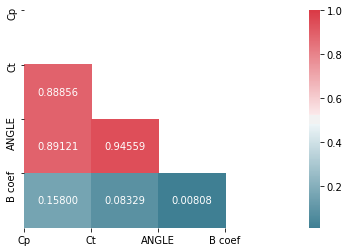

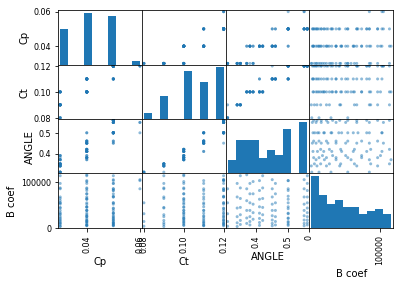

In [25]:
import seaborn as sns
df_MR=df[df['TYPE'] == 'MR']
df_ND=df_MR[df_MR['N.D']<=105000]
df_ND=df_ND[['Cp','Ct','ANGLE','B coef']]

#Heat map with correlation matrix
heatMap(df_ND, mirror=False)
# Scatter matrix

DataScatter=pd.DataFrame(data=df_ND.values, columns=df_ND.columns)
pd.plotting.scatter_matrix(DataScatter)
plt.show()

There is a strong relationship between $C_T, C_P$ and $\beta$. Matematically we express it as:

$f(C_T,C_P,\beta)=0$

$ND>ND_{max}$

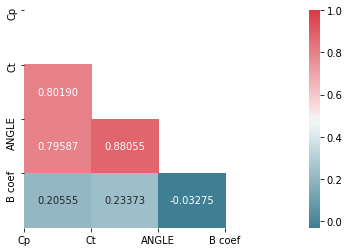

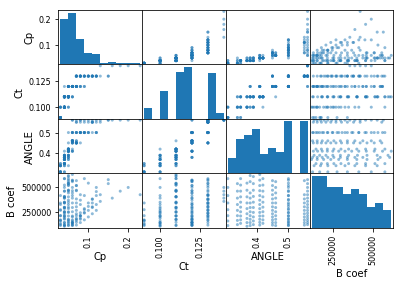

In [38]:
df_MR=df[df['TYPE'] == 'MR']
df_NDmax=df_MR[df_MR['N.D']>=105000]
df_NDmax=df_NDmax[['Cp','Ct','ANGLE','B coef']]

#Heat map with correlation matrix
heatMap(df_NDmax, mirror=False)
# Scatter matrix

DataScatter=pd.DataFrame(data=df_NDmax.values, columns=df_NDmax.columns)
pd.plotting.scatter_matrix(DataScatter)
plt.show()

We can see that the correlation value has worsened slightly. The value of R2 has not collapsed as the dispersion of the data occurs for high pitch values and for low pitch values the data follows a trend.

### 3.- Filtering dynamic propellers data ($V_{drone}\neq 0$)

In [133]:
import pandas as pd

path='./Data/'
df = pd.read_csv(path+'9x45-DynamicProps.csv',sep=';')

df.head()


,TYPE,J,CT,CP,Eta
0,APC-E-9x4.5,0.160,0.0792,0.0386,0.328
1,APC-E-9x4.5,0.195,0.0729,0.0375,0.381
2,APC-E-9x4.5,0.234,0.0656,0.0356,0.432
3,APC-E-9x4.5,0.278,0.0578,0.0333,0.482
4,APC-E-9x4.5,0.315,0.0524,0.0316,0.522


<IPython.core.display.Javascript object>


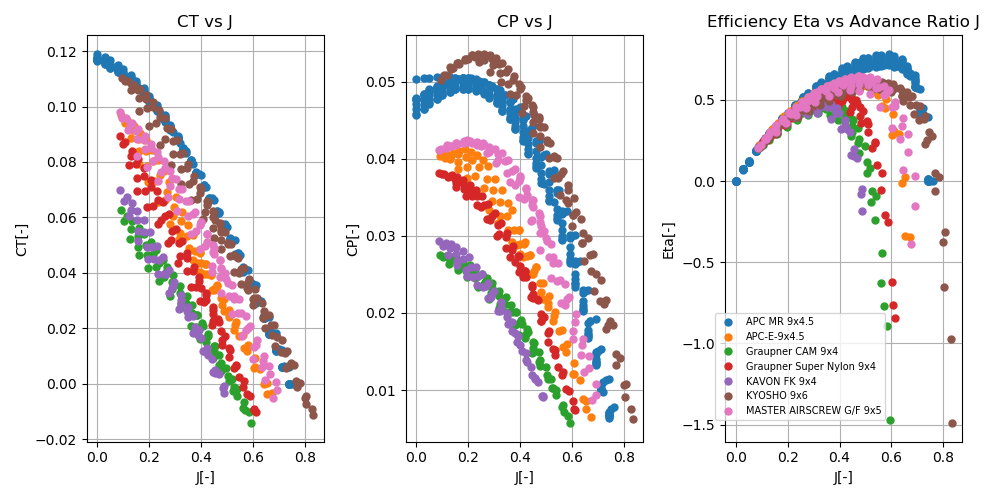

In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

f, ((ax1, ax2,ax3)) = plt.subplots(1, 3,figsize=(10, 5))

groups = df.groupby('TYPE')

for name, group in groups:
    ax1.plot(group.J, group.CT, marker='o', linestyle='', ms=5, 
label=name)
    
ax1.set_title('CT vs J')
ax1.set_xlabel('J[-]')
ax1.set_ylabel('CT[-]')

for name, group in groups:
    ax2.plot(group.J, group.CP, marker='o', linestyle='', ms=5, 
label='_nolegend_')
    
ax2.set_title('CP vs J')
ax2.set_xlabel('J[-]')
ax2.set_ylabel('CP[-]')

for name, group in groups:
    ax3.plot(group.J, group.Eta, marker='o', linestyle='', ms=5, 
label='_nolegend_')
    
ax3.set_title('Efficiency Eta vs Advance Ratio J')
ax3.set_xlabel('J[-]')
ax3.set_ylabel('Eta[-]')

f.legend(bbox_to_anchor=(0.8, 0.15),loc='lower center', prop={'size': 7})
#f.legend(loc=(axbox.x0,0),prop={'size': 8})
ax1.grid()    


ax2.grid() 


ax3.grid()    



f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)


*EXPLANATION*

**APC MR**

These are the performance data for MR propellers when the advance speed is greater than zero. As we see here comes into play the value of advance ratio $\mu$ that in static domain we did not consider.

In [150]:
# Panda package Importation
import pandas as pd

# Read the .csv file with bearing data
path='./Data/'
df = pd.read_csv(path+'output2.csv', sep=';')
# Print the head (first lines of the file)
df.head()

,V,J,Pe,Ct,Cp,PWR,Torque,Thrust,mu_SI,BETA
0,0.0,0.00,0.0000,0.1102,0.0428,0.003,0.087,0.140,0.000000,0.45
1,0.5,0.02,0.0621,0.1086,0.0432,0.003,0.088,0.138,0.006366,0.45
2,0.9,0.05,0.1212,0.1068,0.0435,0.003,0.088,0.136,0.015915,0.45
3,1.4,0.07,0.1774,0.1050,0.0439,0.003,0.089,0.134,0.022282,0.45
4,1.9,0.10,0.2305,0.1030,0.0442,0.003,0.090,0.131,0.031831,0.45


In this part the algorithm will develop a polynomial that adapts to the data we have and whose value of $R_2$ is higher than the one we propose.

#### Correlation matrix 

<IPython.core.display.Javascript object>


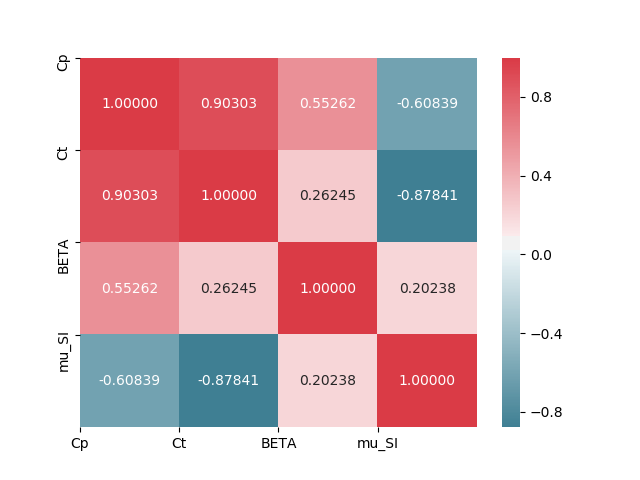

<IPython.core.display.Javascript object>


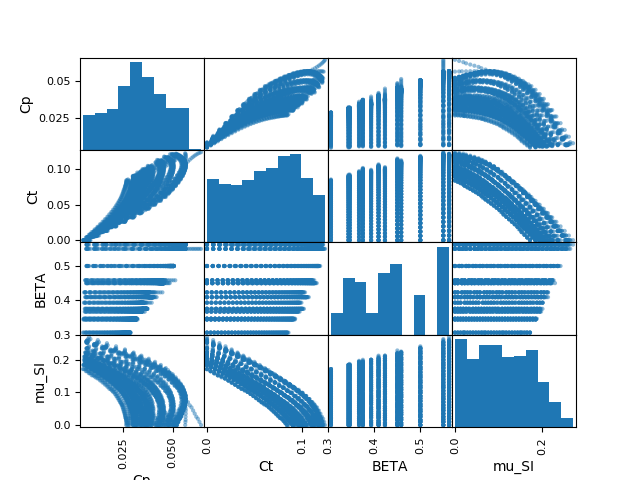

In [152]:
import seaborn as sns

df_MU=df[['Cp','Ct','BETA','mu_SI']]

#Heat map with correlation matrix
heatMap(df_MU, mirror=True)
# Scatter matrix

DataScatter=pd.DataFrame(data=df_MU.values, columns=df_MU.columns)
pd.plotting.scatter_matrix(DataScatter)
plt.show()

**Regression model**

$Cp=f(\mu, \beta)$

RMSE= 0.0017373644424300808
R2= 0.983521425294098
Cp= +(0.046)*1+(0.112)*mu+(-0.301)*beta+(-0.168)*mu^2+(-0.756)*mu beta+(1.054)*beta^2+(-1.934)*mu^3+(-0.866)*mu^2 beta+(1.384)*mu beta^2+(-0.890)*beta^3


<IPython.core.display.Javascript object>


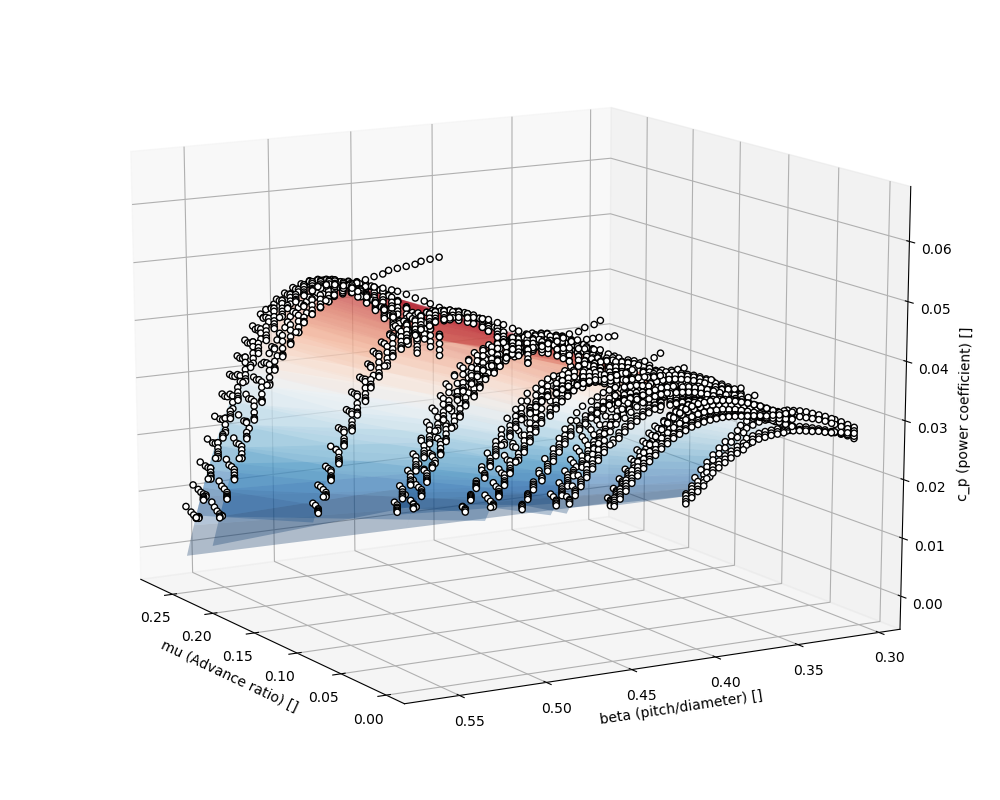

In [129]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as sm


%matplotlib notebook
# read dataframe values
X = df[['mu_SI', 'BETA']].values
y1 = df['Cp'].values

# extracting columns from X
mu_col=X[:,0] 
beta_col=X[:,1]

#a matrix of mu and beta is made
XX = np.concatenate((mu_col.reshape(np.size(y1),1),beta_col.reshape(np.size(y1),1)),axis=1)

# in this while we increase the polynomial binomium until R2 reaches the limit
i=1 # start by 1.Grade polynomium 
while True:
    poly = PolynomialFeatures(i) # development of i-grade polynomium
    x_poly = poly.fit_transform(XX)

    model = sm.OLS(y1, x_poly) #fit regression model to the data
    result= model.fit() # save value of coeficients
    y_poly_pred = result.predict(x_poly) # according to the regression model found, a value of y is generated

    rmse = np.sqrt(mean_squared_error(y1,y_poly_pred)) #Root mean square error
    r2 = r2_score(y1,y_poly_pred) #R2 correlation value
    i +=1 # we increase the polynomium degre
    if r2>0.98: #if R2 calculated is greater than 
        break
print("RMSE=",rmse)
print("R2=",r2)

#here we expand the formula of the i-degree polynomium
data = pd.DataFrame.from_dict({
    'mu': np.random.randint(low=1, high=10, size=5),
    'beta': np.random.randint(low=-1, high=1, size=5),
})

p = PolynomialFeatures(degree=i-1).fit(data)

#concatenate the OLS regression parameters with variables 
string1=['+({:.3f})*'.format(x) for x in result.params]
string2=p.get_feature_names(data.columns)

Result=""
for i in range(len(string1)):
        Result += string1[i]
        Result += string2[i]
print('Cp=',Result)


#meshgrid 3D for plot
xx1, xx2 = np.meshgrid(np.linspace(mu_col.min(), mu_col.max(), len(y1)), 
                       np.linspace(beta_col.min(), beta_col.max(), len(y1)))


#create the 3D axis 
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-210, elev=15)


ax.scatter(mu_col, beta_col, y1, color='black', alpha=1.0, facecolor='white')

# reshape data to suit in the grid. Here a x b = len(y1)
xp = np.reshape(mu_col, (94, 30))
yp = np.reshape(beta_col, (94, 30))
zp = np.reshape(y_poly_pred, (94, 30))

# plotting the predicted surface
ax.plot_surface(xp, yp, zp, cmap=plt.cm.RdBu_r, alpha=0.3, linewidth=0)

#axis labels
ax.set_xlabel('mu (Advance ratio) []')
ax.set_ylabel('beta (pitch/diameter) []')
ax.set_zlabel('c_p (power coefficient) []')

plt.show()

$C_T=f(\mu, \beta)$

RMSE= 0.0019934388284238
R2= 0.9965862330063201
Ct= +(0.011)*1+(-0.442)*mu+(0.282)*beta+(-1.308)*mu^2+(0.516)*mu beta+(-0.139)*beta^2


<IPython.core.display.Javascript object>


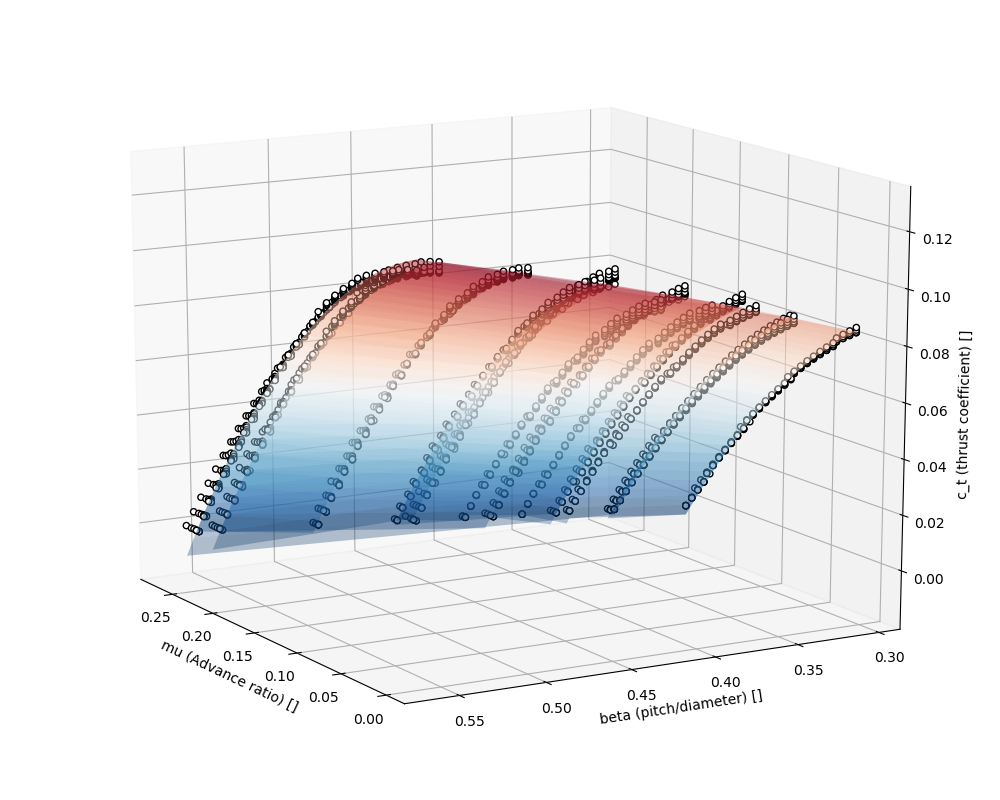

In [130]:
# read dataframe values
X = df[['mu_SI', 'BETA']].values
y1 = df['Ct'].values

# extracting columns from X
mu_col=X[:,0] 
beta_col=X[:,1]

#a matrix of mu and beta is made
XX = np.concatenate((mu_col.reshape(np.size(y1),1),beta_col.reshape(np.size(y1),1)),axis=1)

# in this while we increase the polynomial binomium until R2 reaches the limit
i=1 # start by 1.Grade polynomium 
while True:
    poly = PolynomialFeatures(i) # development of i-grade polynomium
    x_poly = poly.fit_transform(XX)

    model = sm.OLS(y1, x_poly) #fit regression model to the data
    result= model.fit() # save value of coeficients
    y_poly_pred = result.predict(x_poly) # according to the regression model found, a value of y is generated

    rmse = np.sqrt(mean_squared_error(y1,y_poly_pred)) #Root mean square error
    r2 = r2_score(y1,y_poly_pred) #R2 correlation value
    i +=1 # we increase the polynomium degre
    if r2>0.98: #if R2 calculated is greater than 
        break
print("RMSE=",rmse)
print("R2=",r2)

#here we expand the formula of the i-degree polynomium
data = pd.DataFrame.from_dict({
    'mu': np.random.randint(low=1, high=10, size=5),
    'beta': np.random.randint(low=-1, high=1, size=5),
})

p = PolynomialFeatures(degree=i-1).fit(data)

#concatenate the OLS regression parameters with variables 
string1=['+({:.3f})*'.format(x) for x in result.params]
string2=p.get_feature_names(data.columns)

Result=""
for i in range(len(string1)):
        Result += string1[i]
        Result += string2[i]
print('Ct=',Result)


#meshgrid 3D for plot
xx1, xx2 = np.meshgrid(np.linspace(mu_col.min(), mu_col.max(), len(y1)), 
                       np.linspace(beta_col.min(), beta_col.max(), len(y1)))


#create the 3D axis 
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-210, elev=15)


ax.scatter(mu_col, beta_col, y1, color='black', alpha=1.0, facecolor='white')

# reshape data to suit in the grid. Here a x b = len(y1)
xp = np.reshape(mu_col, (94, 30))
yp = np.reshape(beta_col, (94, 30))
zp = np.reshape(y_poly_pred, (94, 30))

# plotting the predicted surface
ax.plot_surface(xp, yp, zp, cmap=plt.cm.RdBu_r, alpha=0.3, linewidth=0)

ax.set_xlabel('mu (Advance ratio) []')
ax.set_ylabel('beta (pitch/diameter) []')
ax.set_zlabel('c_t (thrust coefficient) []')

plt.show()

### References

- Principles of Helicopter Aerodynamics. Leishman
- [Frequently Asked Questions - Composite Constant Speed Propellers](http://m.whirlwindaviation.com/faq.asp)
- [MR Propellers](https://www.masterairscrew.com/pages/mr-drone-propellers)
- [Drones](https://www.droneomega.com/quadcopter-propeller/)
